In [1]:
pip install pandas scikit-learn matplotlib


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# STEP 1: Load the dataset
df = pd.read_csv("API_1_DS2_en_csv_v2_6421.csv", skiprows=4)

# STEP 2: Filter necessary indicators
indicators_to_extract = {
    "Food production index (2014-2016 = 100)": "Food Production Index",
    "Rural population (% of total population)": "Rural Population %",
    "Cereal yield (kg per hectare)": "Cereal Yield",
    "Employment in agriculture (% of total employment) (modeled ILO estimate)": "Agricultural Employment",
    "Prevalence of undernourishment (% of population)": "Undernourishment"
}

df = df[df['Indicator Name'].isin(indicators_to_extract.keys())]
df['Indicator Name'] = df['Indicator Name'].map(indicators_to_extract)

# STEP 3: Reshape the data into wide format
value_years = [str(y) for y in range(2000, 2022)]
df_melted = df.melt(id_vars=["Country Name", "Indicator Name"],
                    value_vars=value_years,
                    var_name="Year",
                    value_name="Value")

df_pivot = df_melted.pivot_table(
    index=["Country Name", "Year"],
    columns="Indicator Name",
    values="Value"
).reset_index()

df_clean = df_pivot.dropna()

# STEP 4: Prepare features and target
features = ["Food Production Index", "Rural Population %", "Cereal Yield", "Agricultural Employment"]
target = "Undernourishment"

X = df_clean[features]
y = df_clean[target]

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# STEP 5: Train-Test Split and Model Training
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# STEP 6: Plot Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
plt.title("Feature Importance - Hunger Prediction Model", fontsize=14)
bars = plt.bar(range(len(features)), importances[indices], color='tomato', edgecolor='black')
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=30)
plt.ylabel("Importance Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


KeyError: 'Undernourishment'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# STEP 1: Load the dataset
df = pd.read_csv("API_1_DS2_en_csv_v2_6421.csv", skiprows=4)

# STEP 2: Filter necessary indicators
indicators_to_extract = {
    "Food production index (2014-2016 = 100)": "Food Production Index",
    "Rural population (% of total population)": "Rural Population %",
    "Cereal yield (kg per hectare)": "Cereal Yield",
    "Employment in agriculture (% of total employment) (modeled ILO estimate)": "Agricultural Employment",
    "Prevalence of undernourishment (% of population)": "Undernourishment"
}

df = df[df['Indicator Name'].isin(indicators_to_extract.keys())]
df['Indicator Name'] = df['Indicator Name'].map(indicators_to_extract)

# STEP 3: Reshape the data into wide format
value_years = [str(y) for y in range(2000, 2022)]
df_melted = df.melt(id_vars=["Country Name", "Indicator Name"],
                    value_vars=value_years,
                    var_name="Year",
                    value_name="Value")

df_pivot = df_melted.pivot_table(
    index=["Country Name", "Year"],
    columns="Indicator Name",
    values="Value"
).reset_index()

df_clean = df_pivot.dropna()

# STEP 4: Prepare features and target
features = ["Food Production Index", "Rural Population %", "Cereal Yield", "Agricultural Employment"]
target = "Undernourishment"

# Check the columns in df_clean to see if 'Undernourishment' exists
print("Columns in df_clean:", df_clean.columns)

# Check if the target column exists before proceeding
if target not in df_clean.columns:
    print(f"Error: Target column '{target}' not found in df_clean after dropping NaNs.")
    # You might want to stop execution or handle this case appropriately
    # For example, you could exit or skip the model training/plotting steps
else:
    X = df_clean[features]
    y = df_clean[target]

    # Normalize features
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # STEP 5: Train-Test Split and Model Training
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # STEP 6: Plot Feature Importance
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(8, 5))
    plt.title("Feature Importance - Hunger Prediction Model", fontsize=14)
    bars = plt.bar(range(len(features)), importances[indices], color='tomato', edgecolor='black')
    plt.xticks(range(len(features)), [features[i] for i in indices], rotation=30)
    plt.ylabel("Importance Score")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Columns in df_clean: Index(['Country Name', 'Year', 'Agricultural Employment', 'Cereal Yield',
       'Food Production Index', 'Rural Population %'],
      dtype='object', name='Indicator Name')
Error: Target column 'Undernourishment' not found in df_clean after dropping NaNs.


In [6]:
# Check what indicators are actually present
print(df['Indicator Name'].unique())


['Rural Population %' 'Agricultural Employment' 'Cereal Yield'
 'Food Production Index']


In [10]:
# Load the undernourishment CSV (adjust filename as needed)
# Specify the file to read within the ZIP archive
und_df = pd.read_csv("/content/API_SN.ITK.DEFC.ZS_DS2_en_csv_v2_85103.csv", skiprows=4)

# Keep only relevant columns (Country, Year, Value)
und_melted = und_df.melt(
    id_vars=["Country Name"],
    value_vars=[str(y) for y in range(2000, 2022)],
    var_name="Year",
    value_name="Undernourishment"
)

# Drop NaNs
und_melted = und_melted.dropna()

In [11]:
# Merge on Country Name and Year
df_final = pd.merge(df_clean, und_melted, on=["Country Name", "Year"])

# Check result
print(df_final.head())


  Country Name  Year  Agricultural Employment  Cereal Yield  \
0  Afghanistan  2001                65.025449        1006.7   
1  Afghanistan  2002                64.186689        1669.8   
2  Afghanistan  2003                63.481557        1458.0   
3  Afghanistan  2004                62.469948        1334.8   
4  Afghanistan  2005                61.703552        1790.4   

   Food Production Index  Rural Population %  Undernourishment  
0                  61.59              77.831              46.0  
1                  74.72              77.739              43.7  
2                  76.77              77.647              38.6  
3                  74.75              77.500              35.9  
4                  83.54              77.297              34.2  


In [12]:
features = ["Food Production Index", "Rural Population %", "Cereal Yield", "Agricultural Employment"]
target = "Undernourishment"
# ... (rest of the Random Forest + graph code from earlier)


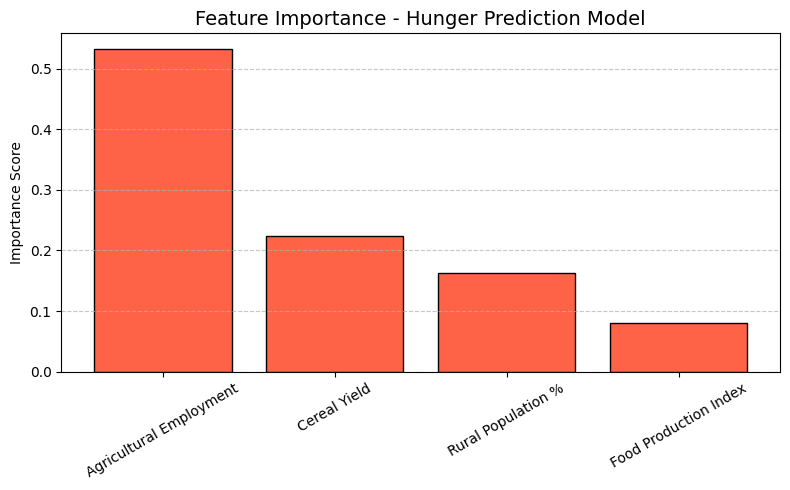

In [14]:
features = ["Food Production Index", "Rural Population %", "Cereal Yield", "Agricultural Employment"]
target = "Undernourishment"

X = df_final[features]
y = df_final[target]

# Normalize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Plot
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
plt.title("Feature Importance - Hunger Prediction Model", fontsize=14)
bars = plt.bar(range(len(features)), importances[indices], color='tomato', edgecolor='black')
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=30)
plt.ylabel("Importance Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
